In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set configurations
pd.set_option('display.max_columns', 100)
sns.set_style("white")

# model imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import pickle
import joblib

# NLP Imports
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayaanhaque/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayaanhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
model_data = pd.read_csv('../data/data_for_model.csv', keep_default_na=False)

In [5]:
# Cleaning the Text
def processing_text(series_to_process):
    new_list = []
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()

    for i in range(len(series_to_process)):
        # tokenized item in a new list
        dirty_string = (series_to_process)[i].lower()
        words_only = tokenizer.tokenize(dirty_string) # words_only is a list of only the words, no punctuation
        #Lemmatize the words_only
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        # removing stop words
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        # return seperated words
        long_string_clean = " ".join(word for word in words_without_stop)
        new_list.append(long_string_clean)
        return new_list

In [21]:
#Vectorization : -

from sklearn.feature_extraction.text import TfidfVectorizer

X = model_data["megatext_clean"]
y = model_data['is_suicide']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

tvec_optimised = TfidfVectorizer(ngram_range=(1, 3),stop_words = 'english')
X_train_tvec = tvec_optimised.fit_transform(X).todense()
# X_test_tvec = tvec_optimised.transform(X_test).todense()

In [22]:
len(X)

1897

In [26]:
modelkmeans = KMeans(n_clusters=2, init='k-means++', n_init=100)
# modelkmeans = KMeans(2,1,100) figure out how to use this guys class
modelkmeans.fit(X_train_tvec)

KMeans(n_clusters=2, n_init=100)

In [25]:
joblib.dump(modelkmeans, "kmeans.h5")
# modelkmeans = joblib.load("kmeans.h5")

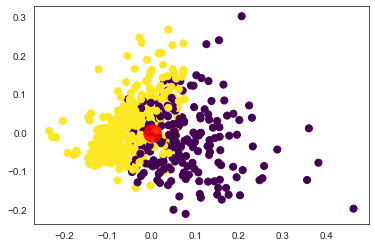

In [10]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_test_tvec)

predicted_values = modelkmeans.predict(X_test_tvec)
# fitted = modelkmeans.fit(X_test_tvec)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

# centers = fitted.centroids once we get the Kmeans class working, we can graph centroids
centers = np.array(modelkmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=300, alpha=0.6);

In [13]:
labels_np = modelkmeans.labels_

In [17]:
labels_np

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,

In [18]:
model_data["Clustered Labels"] = labels_np

ValueError: Length of values does not match length of index

In [19]:
model_data.head

<bound method NDFrame.head of                                                   title  \
0     Our most-broken and least-understood rules is ...   
1                                 Regular Check-In Post   
2     I hate it so much when you try and express you...   
3     I went to the hospital because I was having re...   
4                                       Cake day for me   
...                                                 ...   
1892                                I'm in so much pain   
1893  I'm too stupid to achieve anything in life. I'...   
1894                                            Useless   
1895  I wish it was as easy as disappearing into thi...   
1896       i dont know what to do with myself right now   

                                               selftext            author  \
0     We understand that most people who reply immed...          SQLwitch   
1     Welcome to /r/depression's check-in post - a p...          circinia   
2     I've been feeling really

In [20]:
len(labels_np)

475